In [1]:
# Import necessary libraries

from IPython.core import prefilter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import warnings

import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Ignore specific warning categories

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Read the CSV file into a Pandas DataFrame

dot = pd.read_csv(r'D:\datas\DataOps\Data\children anemia.csv')

In [ ]:
# Set Pandas display options to show a maximum of 100 rows and columns, and set the display width to 100 characters

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [ ]:
# Display the first few rows of the DataFrame

dot.head()

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
0,40-44,Urban,Higher,Richest,1,22,NaN,NaN,Yes,No,Living with partner,Staying elsewhere,Immediately,No,NaN,NaN,Yes
1,35-39,Urban,Higher,Richest,1,28,NaN,NaN,Yes,No,Married,Living with her,Hours: 1,No,NaN,NaN,No
2,25-29,Urban,Higher,Richest,1,26,NaN,NaN,No,No,Married,Living with her,Immediately,No,NaN,NaN,No
3,25-29,Urban,Secondary,Richest,1,25,95.0,Moderate,Yes,No,Married,Living with her,105.0,No,114.0,Not anemic,No
4,20-24,Urban,Secondary,Richest,1,21,NaN,NaN,Yes,No,No longer living together/separated,NaN,Immediately,No,NaN,NaN,No


In [ ]:
# Get the shape of the DataFrame (number of rows and columns)

dot.shape

(33924, 17)

In [ ]:
# Check and count the number of missing values in each column of the DataFrame

dot.isnull().sum()

Age in 5-year groups                                                         0
Type of place of residence                                                   0
Highest educational level                                                    0
Wealth index combined                                                        0
Births in last five years                                                    0
Age of respondent at 1st birth                                               0
Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)    20788
Anemia level                                                             20788
Have mosquito bed net for sleeping (from household questionnaire)            0
Smokes cigarettes                                                            0
Current marital status                                                       0
Currently residing with husband/partner                                   1698
When child put to breast                            

In [ ]:
# Get the names of the columns

dot.columns

Index(['Age in 5-year groups', 'Type of place of residence', 'Highest educational level',
       'Wealth index combined', 'Births in last five years', 'Age of respondent at 1st birth',
       'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)', 'Anemia level',
       'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes',
       'Current marital status', 'Currently residing with husband/partner',
       'When child put to breast', 'Had fever in last two weeks',
       'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', 'Anemia level.1',
       'Taking iron pills, sprinkles or syrup'],
      dtype='object')

In [ ]:
# Rename columns for better clarity and ease of analysis

dot.rename(columns={'Age in 5-year groups': 'age',
                   'Type of place of residence': 'residence',
                   'Highest educational level': 'highest_educational',
                   'Wealth index combined': 'wealth_index',
                   'Births in last five years': 'births_5_years',
                   'Age of respondent at 1st birth': 'respondent_1st_birth',
                   'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)': 'hemoglobin_altitude_smoking',
                   'Anemia level': 'anemia_level_target',
                   'Have mosquito bed net for sleeping (from household questionnaire)': 'mosquito_bed_sleeping',
                   'Smokes cigarettes': 'smoking',
                   'Current marital status': 'status',
                   'Currently residing with husband/partner': 'residing_husband_partner',
                   'When child put to breast': 'child_put_breast',
                   'Had fever in last two weeks': 'fever_two_weeks',
                   'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)': 'hemoglobin_altitude',
                   'Anemia level.1': 'anemia_level_1',
                   'Taking iron pills, sprinkles or syrup': 'iron_pills'}, inplace=True)


In [ ]:
# Function to replace NaN values with the mean of the column
def reloc_nan(x):
    """
    Replace NaN values in a pandas Series with the mean of the column.

    """
    mean_value = x.mean()  # Calculate the mean value of the column
    return x.fillna(mean_value)  # Replace NaN values with the mean


In [ ]:
# Replace NaN values in the 'hemoglobin_altitude_smoking' column with the mean of the column

dot['hemoglobin_altitude_smoking'] = reloc_nan(dot['hemoglobin_altitude_smoking'])

In [ ]:
# Define a function to replace NaN values in the 'residing_husband_partner' column with a specific word

def replace_nan_residing(x):
    """
    Replace NaN values in a pandas Series with a specific word.

    """
    word = 'Staying elsewhere'  # Specify the word to replace NaN values
    return x.fillna(word)  # Replace NaN values with the specified word

# Apply the function to replace NaN values in the 'residing_husband_partner' column
dot['residing_husband_partner'] = replace_nan_residing(dot['residing_husband_partner'])


In [ ]:
# Convert categorical values in 'child_put_breast' column to numerical representation

def func_child_put_breast(dot):

    values = dot['child_put_breast'].values
    for idx, val in enumerate(values):
        values[idx] = 0 if val == 'Immediately' else (0.5 if val == 'Hours: 1' else (1 if val == 'Days: 1' else val))
    dot['child_put_breast'] = values
    return dot

# Apply function to convert categorical values in 'child_put_breast' column
dot = func_child_put_breast(dot)


In [ ]:
# Convert the 'child_put_breast' column to the float64 data type

dot['child_put_breast'] = dot['child_put_breast'].astype('float64')


In [ ]:
# Replace NaN values in the 'child_put_breast' column with the mean of the column

dot['child_put_breast'] = reloc_nan(dot['child_put_breast'])


In [ ]:
# Fill NaN values in the 'fever_two_weeks' column with the string "Dont know"

dot['fever_two_weeks'] = dot['fever_two_weeks'].fillna("Dont know")


In [ ]:
# Replace NaN values in 'hemoglobin_altitude' column with the mean and round to 1 decimal place

dot['hemoglobin_altitude'] = reloc_nan(dot['hemoglobin_altitude']).apply(lambda x: round(x, 1))


In [ ]:
# Fill NaN values in specified columns with the string "Dont know"

dot['anemia_level_1'] = dot['anemia_level_1'].fillna("Dont know")
dot['iron_pills'] = dot['iron_pills'].fillna("Dont know")
dot['anemia_level_target'] = dot['anemia_level_target'].fillna("Dont know")


In [ ]:
# Define a function to replace specific values in the DataFrame with standardized values

def func_replace(dot):

    def val_replace(value):
        if value == "Don't know":
            return 'Dont know'
        else:
            return value

    # Apply the value replacement function to all elements in the DataFrame
    dot = dot.applymap(val_replace)
    return dot

# Apply the function to replace specific values in the DataFrame
dot = func_replace(dot)

#####################

In [ ]:
# Generate and transpose descriptive statistics summary for the DataFrame

dot.describe().T


,count,mean,std,min,25%,50%,75%,max
births_5_years,33924.0,1.823783,0.705460,1.0,1.000000,2.000000,2.000000,6.0
respondent_1st_birth,33924.0,19.570776,4.313172,12.0,16.000000,19.000000,22.000000,48.0
hemoglobin_altitude_smoking,33924.0,114.367235,9.903431,20.0,114.367235,114.367235,114.367235,218.0
child_put_breast,33924.0,40.690429,48.417658,0.0,0.000000,40.690429,40.690429,223.0
hemoglobin_altitude,33924.0,101.291051,8.529540,29.0,101.300000,101.300000,101.300000,170.0


In [ ]:
# Define a function to calculate the mean of age groups represented as strings

def func_mean_column_age(x):

    if isinstance(x, str):
        start, end = map(int, x.split('-'))
        return (start + end) / 2
    else:
        return x

# Apply the function to calculate the mean of age groups in the 'age' column
dot['age'] = dot['age'].apply(lambda x: func_mean_column_age(x) if isinstance(x, str) else x)


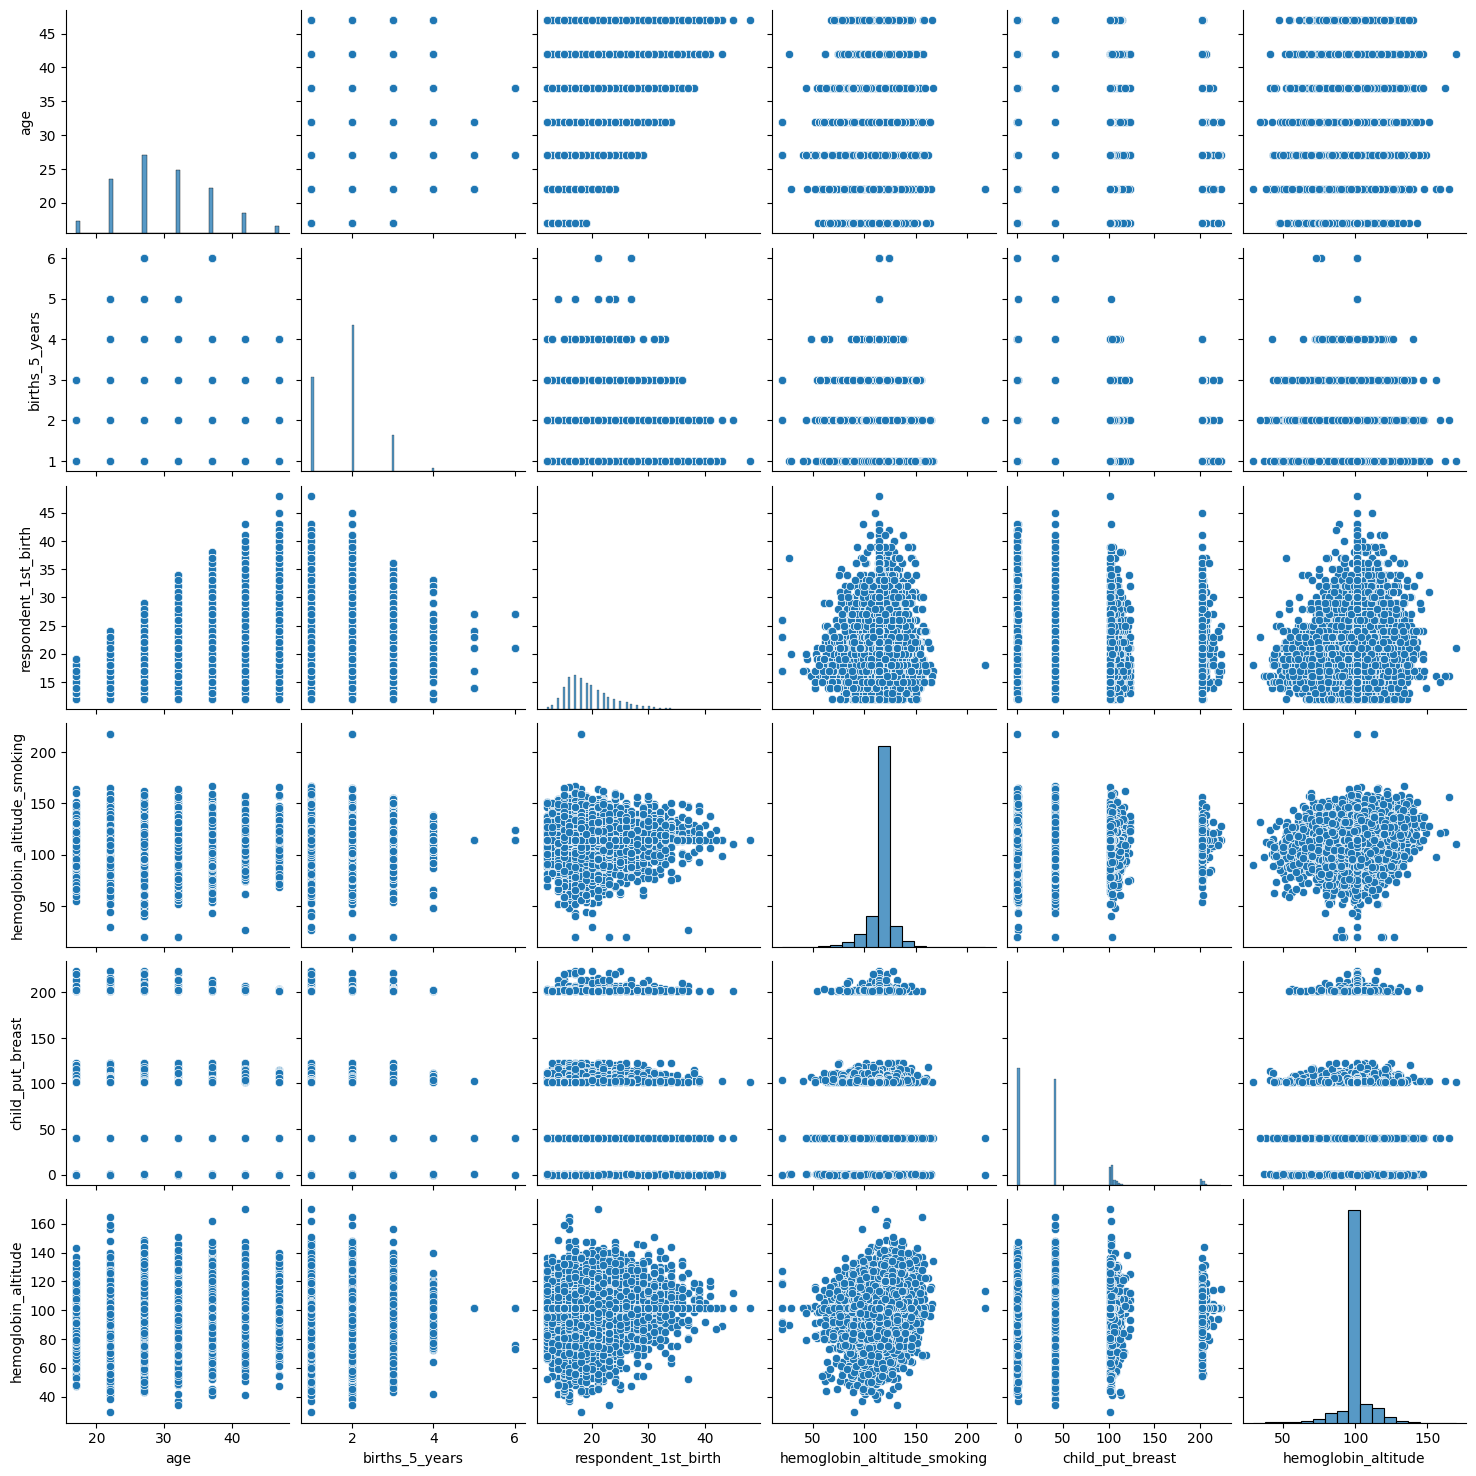

In [ ]:
# Generate a pair plot for visualizing relationships between numerical variables

sns.pairplot(dot)


In [ ]:

# Map 'Yes' to 1 and 'No' to 0 in specified columns

col = ['mosquito_bed_sleeping', 'smoking', 'fever_two_weeks', 'iron_pills']

for column in col:
    dot[column] = dot[column].map({'Yes': 1, 'No': 0})


In [ ]:
# Display the unique values in the 'status' column

dot['status'].unique()


array(['Living with partner', 'Married',
       'No longer living together/separated', 'Never in union', 'Widowed',
       'Divorced'], dtype=object)

In [ ]:
# Replace 'No longer living together/separated' with 'Separated' in the 'status' column

dot['status'] = dot['status'].replace('No longer living together/separated', 'Separated')


In [ ]:

# Create dummy variables for specified categorical columns and concatenate them to the DataFrame

col = ['residence', 'highest_educational', 'wealth_index']

for column in col:
    # Generate dummy variables and drop the first category to avoid multicollinearity
    status = pd.get_dummies(dot[column], prefix=column, drop_first=False)
    
    # Concatenate dummy variables to the original DataFrame
    dot = pd.concat([dot, status], axis=1)



In [ ]:
# Drop specified columns 'residence', 'highest_educational', 'wealth_index' from the DataFrame

dot = dot.drop(columns=['residence', 'highest_educational', 'wealth_index'], axis=1)


In [ ]:
# Display the first few rows of the modified DataFrame

dot.head()


,age,births_5_years,respondent_1st_birth,hemoglobin_altitude_smoking,anemia_level_target,mosquito_bed_sleeping,smoking,status,residing_husband_partner,child_put_breast,fever_two_weeks,hemoglobin_altitude,anemia_level_1,iron_pills,residence_Rural,residence_Urban,highest_educational_Higher,highest_educational_No education,highest_educational_Primary,highest_educational_Secondary,wealth_index_Middle,wealth_index_Poorer,wealth_index_Poorest,wealth_index_Richer,wealth_index_Richest
0,42.0,1,22,114.367235,Dont know,1,0,Living with partner,Staying elsewhere,0.0,0.0,101.3,Dont know,1.0,0,1,1,0,0,0,0,0,0,0,1
1,37.0,1,28,114.367235,Dont know,1,0,Married,Living with her,0.5,0.0,101.3,Dont know,0.0,0,1,1,0,0,0,0,0,0,0,1
2,27.0,1,26,114.367235,Dont know,0,0,Married,Living with her,0.0,0.0,101.3,Dont know,0.0,0,1,1,0,0,0,0,0,0,0,1
3,27.0,1,25,95.000000,Moderate,1,0,Married,Living with her,105.0,0.0,114.0,Not anemic,0.0,0,1,0,0,0,1,0,0,0,0,1
4,22.0,1,21,114.367235,Dont know,1,0,Separated,Staying elsewhere,0.0,0.0,101.3,Dont know,0.0,0,1,0,0,0,1,0,0,0,0,1


In [ ]:
# Drop rows with any missing values from the DataFrame

dot = dot.dropna()


In [ ]:
# Copy DataSet
dot_df_copy = dot.copy()

In [ ]:
# Separate features (X) and target variable (y) from the DataFrame

X = dot.drop(columns=['anemia_level_target'], axis=1)  # Features
y = dot['anemia_level_target']  # Target variable


In [ ]:
# Identify columns with object (categorical) data in the features (X)

obj = [col for col in X.columns if dot[col].dtype == 'object']


In [ ]:
# List of column names in X with 'object' data type (likely categorical variables)

print(obj)


['status', 'residing_husband_partner', 'anemia_level_1']


In [ ]:
# Display the unique values in the target variable (y)

y.unique()


array(['Dont know', 'Moderate', 'Mild', 'Not anemic', 'Severe'],
      dtype=object)

In [ ]:

# Apply Label Encoding to categorical columns in the features (X)

for i in obj:
    lr = LabelEncoder()  # Initialize a LabelEncoder for the current column
    X[i] = lr.fit_transform(X[i])  # Transform the categorical values to numerical labels




In [ ]:
# Map categories in the target variable (y) to numerical labels

y = y.map({'Dont know': 0, 'Moderate': 1, 'Mild': 2, 'Not anemic': 3, 'Severe': 4})


In [ ]:

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

######################################################### bỏ